In [48]:
import pandas as pd

'''
df = pd.read_table("/Users/liuqianyi/Downloads/vdjdb-2022-03-30/vdjdb.tsv")
df1 = df.drop(columns= ['vdjdb.score','web.method','web.method.seq','web.cdr3fix.nc','web.cdr3fix.unmp','antigen.epitope','species','complex.id'])
print(df1.dtypes)
df1

df.head()
'''

'\ndf = pd.read_table("/Users/liuqianyi/Downloads/vdjdb-2022-03-30/vdjdb.tsv")\ndf1 = df.drop(columns= [\'vdjdb.score\',\'web.method\',\'web.method.seq\',\'web.cdr3fix.nc\',\'web.cdr3fix.unmp\',\'antigen.epitope\',\'species\',\'complex.id\'])\nprint(df1.dtypes)\ndf1\n\ndf.head()\n'

In [49]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#pca.fit(df1)
# This should equal the sum of the first two values in the cumulative proportion plot
#print('Explained variance ratio '+ str(pca.explained_variance_ratio_))

# Project data onto first two principal components
#projX = pca.transform(df1)
#plt.figure(4)
#plt.plot(projX[:,0], projX[:,1], 'k.')
#plt.title('Projected data')
#plt.show()

In [50]:
'''
import pandas as pd
from tcrdist.repertoire import TCRrep

df = pd.read_csv("https://raw.githubusercontent.com/kmayerb/tcrdist2/API2/tcrdist/test_files_compact/dash.csv")
tr = TCRrep(cell_df = df, 
            organism = 'mouse', 
            chains = ['alpha','beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

tr.pw_alpha
tr.pw_beta
tr.pw_cdr3_a_aa
tr.pw_cdr3_b_aa
'''

'\nimport pandas as pd\nfrom tcrdist.repertoire import TCRrep\n\ndf = pd.read_csv("https://raw.githubusercontent.com/kmayerb/tcrdist2/API2/tcrdist/test_files_compact/dash.csv")\ntr = TCRrep(cell_df = df, \n            organism = \'mouse\', \n            chains = [\'alpha\',\'beta\'], \n            db_file = \'alphabeta_gammadelta_db.tsv\')\n\ntr.pw_alpha\ntr.pw_beta\ntr.pw_cdr3_a_aa\ntr.pw_cdr3_b_aa\n'

In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

'''
(0)筛查NA的数据

要将编码函数应用于pandas数据帧中缺失(NA)值的列，可以在编码之前使用fillna方法将缺失值替换为合适的值，例如平均值或众数。

下面是如何将编码函数应用到pandas数据框架中缺失值的列的示例:

这将用列的模式替换'HLA'列中缺失的值，然后对'HLA'列应用one-hot编码函数，将编码的值添加到新列'encoded_HLA'中。
# Define a sample dataframe with missing values
df = pd.DataFrame({'HLA': ['HLA-A*01:01', 'HLA-B*01:02', 'HLA-C*01:03', np.nan]})

# Replace the missing values with the mode
df['HLA'].fillna(df['HLA'].mode()[0], inplace=True)
'''

'''
# Define the encoding function
def one_hot_encoding(hla, hla_dict=None):
    if hla_dict is None:
        hla_dict = {'CIVRAPGRADMRF': 0, 'HLA-A*01:02': 1, 'HLA-A*01:03': 2,
                    'HLA-B*01:01': 3, 'HLA-B*01:02': 4, 'HLA-B*01:03': 5,
                    'HLA-C*01:01': 6, 'HLA-C*01:02': 7, 'HLA-C*01:03': 8,
                    'HLA-DQA1*01:01': 9, 'HLA-DQA1*01:02': 10, 'HLA-DQA1*01:03': 11}
    n_classes = len(hla_dict)
    one_hot = np.zeros(n_classes)
    one_hot[hla_dict[hla]] = 1
    return one_hot

# Apply the encoding function to the 'HLA' column of the dataframe
df['encoded_HLA'] = df['HLA'].apply(lambda x: one_hot_encoding(x))
print(df)
This will replace the missing values in the 'HLA' column with the mode of the column, and then apply the one-hot encoding function to the 'HLA' column, adding the encoded values to a new column 'encoded_HLA'.


'''

"\n# Define the encoding function\ndef one_hot_encoding(hla, hla_dict=None):\n    if hla_dict is None:\n        hla_dict = {'CIVRAPGRADMRF': 0, 'HLA-A*01:02': 1, 'HLA-A*01:03': 2,\n                    'HLA-B*01:01': 3, 'HLA-B*01:02': 4, 'HLA-B*01:03': 5,\n                    'HLA-C*01:01': 6, 'HLA-C*01:02': 7, 'HLA-C*01:03': 8,\n                    'HLA-DQA1*01:01': 9, 'HLA-DQA1*01:02': 10, 'HLA-DQA1*01:03': 11}\n    n_classes = len(hla_dict)\n    one_hot = np.zeros(n_classes)\n    one_hot[hla_dict[hla]] = 1\n    return one_hot\n\n# Apply the encoding function to the 'HLA' column of the dataframe\ndf['encoded_HLA'] = df['HLA'].apply(lambda x: one_hot_encoding(x))\nprint(df)\nThis will replace the missing values in the 'HLA' column with the mode of the column, and then apply the one-hot encoding function to the 'HLA' column, adding the encoded values to a new column 'encoded_HLA'.\n\n\n"

In [52]:
'''
(1)
'''
# Load the data 
df_TRS_only = pd.read_table("/Users/liuqianyi/Downloads/TRA-Pair-Only.tsv")

'''
(2) Change String value to numeric value
'''


'\n(2) Change String value to numeric value\n'

In [53]:
#complex.id 打算删除

In [54]:
#Gene

# Encode the string test data using LabelEncoder
le = LabelEncoder()
#LabelEncoder是一个预处理工具，用于将分类变量(字符串)编码为数值。
# Encode the string data using LabelEncoder
df_TRS_only[["Gene"]]= df_TRS_only[["Gene"]].apply(lambda col: le.fit_transform(col))

In [190]:
# CDR3
import re
from collections import Counter

#查看frame的列中是否包含有A-Z字母的字符串的数据，并且统计A-Z每个字母分别出现的个数并且进行打印
df_TRS_only['CDR3'] = df_TRS_only['CDR3'].astype(str)
char_counts_CDR3 = {}

for elem in df_TRS_only['CDR3']:
    for char in elem:
        if char not in char_counts_CDR3:
            char_counts_CDR3[char] = 0
        char_counts_CDR3[char] = char_counts_CDR3[char]
'''

#对CDR3进行编码
def CDR3_encoding(sequence, aa_dict=None):
    if aa_dict is None:
        aa_dict = {'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6,
                   'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12,
                   'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18,
                   'W': 19, 'Y': 20}
    return [aa_dict[aa] for aa in sequence]

#总数
df_TRS_only['CDR3'] = df_TRS_only['CDR3'].apply(lambda x: CDR3_encoding(x))

#组合数
#df_TRS_only['CDR3'] = df_TRS_only['CDR3'].apply(lambda x: CDR3_encoding(x))

#检查对应总数是否存在重复的情况
'''

"\n\n#对CDR3进行编码\ndef CDR3_encoding(sequence, aa_dict=None):\n    if aa_dict is None:\n        aa_dict = {'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6,\n                   'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12,\n                   'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18,\n                   'W': 19, 'Y': 20}\n    return [aa_dict[aa] for aa in sequence]\n\n#总数\ndf_TRS_only['CDR3'] = df_TRS_only['CDR3'].apply(lambda x: CDR3_encoding(x))\n\n#组合数\n#df_TRS_only['CDR3'] = df_TRS_only['CDR3'].apply(lambda x: CDR3_encoding(x))\n\n#检查对应总数是否存在重复的情况\n"

In [182]:
#V
#查找V所有的种类，根据种类进行以下操作,
#查看frame列中除数字以外所有其他字符种类，并且计算这些字符出现的次数
'''
df_TRS_only['V'] = df_TRS_only['V'].astype(str)
non_numeric_chars = [char for elem in df_TRS_only['V'] for char in elem if not char.isnumeric()]
char_counts = Counter(non_numeric_chars)
print(char_counts)
'''

df_TRS_only['V'] = df_TRS_only['V'].astype(str)
char_counts_V = {}

for elem in df_TRS_only['V']:
    for char in elem:
        if char not in char_counts_V:
            char_counts_V[char] = 0
        char_counts_V[char] += 1

'''
{'T': 55631, 'R': 55631, 'A': 27820, 'V': 59428, '2': 27007, '6': 6524, '-': 31307, '1': 90086, '*': 55631, '0': 59370, '3': 12869, '8': 6036, '/': 3797, 'D': 4385, '7': 7666, '5': 7089, '4': 9089, '9': 10855, 'N': 883, 'B': 27811, 'n': 18, 'a': 9}
'''


def V_encoding(sequence, aa_dict=None):
    if aa_dict is None:
        aa_dict = {'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8,
                   '8': 9, '9': 10, 'T': 11, 'R': 12, 'A': 13, 'V': 14, '-': 15, '*': 16,
                   '/':17, 'D': 18, 'N': 19, 'B': 20, 'n': 21, 'a': 22}                   
    return [aa_dict[aa] for aa in sequence]
    
#总数
df_TRS_only['V'] = df_TRS_only['V'].apply(lambda x: sum(V_encoding(x)))


#检查对应总数是否存在重复的情况

       Gene  CDR3   V   J  Species  MHC A  MHC B  MHC class Epitope  \
0         0   113  17   4        0     28     13          0      25   
1         0   145  12   6        0     28     13          0      25   
2         0   149  17   9        0     28     13          0      25   
3         0   113  17   4        0     28     13          0      28   
4         0   145  12   6        0     28     13          0      28   
...     ...   ...  ..  ..      ...    ...    ...        ...     ...   
55635     1   120   5  10        0     44     13          0     109   
55636     1   162   7   4        0     44     13          0     109   
55637     1   130   6  10        0     44     13          0     109   
55638     1   203  17   3        0     44     13          0     109   
55639     1   169  19   4        0     44     13          0     109   

       Epitope gene  Epitope species  
0                36                9  
1                36                9  
2                36           

In [180]:
#J
#查找V所有的种类，根据种类进行以下操作,
df_TRS_only['J'] = df_TRS_only['J'].astype(str)
char_counts_J = {}

for elem in df_TRS_only['J']:
    for char in elem:
        if char not in char_counts_J:
            char_counts_J[char] = 0
        char_counts_J[char] += 1

'''
{'T': 55564, 'R': 55564, 'A': 27820, 'J': 55564, '4': 10829, '3': 14154, '*': 55564, '0': 59210, '1': 78392, '2': 32935, '8': 1965, '5': 8821, '9': 2789, '7': 7210, '6': 3272, 'B': 27744, '-': 27744, 'n': 152, 'a': 76}
'''

def J_encoding(sequence, aa_dict=None):
    if aa_dict is None:
        aa_dict = {'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8, '8': 9, 
                   '9': 10, 'T': 11, 'R': 12, 'A': 13, 'J': 23 , '-': 15, '*': 16, 'B': 20, 'n': 21, 'a': 22}                   
    return [aa_dict[aa] for aa in sequence]
    
#总数
df_TRS_only['J'] = df_TRS_only['J'].apply(lambda x: sum(J_encoding(x)))
print(df_TRS_only)

       Gene  CDR3    V   J  Species  MHC A  MHC B  MHC class Epitope  \
0         0   113   96   4        0     28     13          0      25   
1         0   145   73   6        0     28     13          0      25   
2         0   149  158   9        0     28     13          0      25   
3         0   113   96   4        0     28     13          0      28   
4         0   145   73   6        0     28     13          0      28   
...     ...   ...  ...  ..      ...    ...    ...        ...     ...   
55635     1   120  101  10        0     44     13          0     109   
55636     1   162  103   4        0     44     13          0     109   
55637     1   130  102  10        0     44     13          0     109   
55638     1   203   87   3        0     44     13          0     109   
55639     1   169   98   4        0     44     13          0     109   

       Epitope gene  Epitope species  
0                36                9  
1                36                9  
2                3

In [181]:
#Species
#使用LabelEncoder()对Species直接进行转换

# Encode the string test data using LabelEncoder
le = LabelEncoder()
#LabelEncoder是一个预处理工具，用于将分类变量(字符串)编码为数值。
# Encode the string data using LabelEncoder
df_TRS_only[["Species"]]= df_TRS_only[["Species"]].apply(lambda col: le.fit_transform(col))

In [170]:
#MHC A

df_TRS_only['MHC A'] = df_TRS_only['MHC A'].astype(str)
char_counts_MHC_A = {}

for elem in df_TRS_only['MHC A']:
    for char in elem:
        if char not in char_counts_MHC_A:
            char_counts_MHC_A[char] = 0
        char_counts_MHC_A[char] += 1

'''
{'H': 55640, 'L': 51340, 'A': 98166, '-': 55640, 'B': 4468, '*': 51316, '0': 96028, '8': 3098, '2': 18362, 'D': 2352, 'Q': 112, '1': 60906, ':': 51206, 'R': 346, 'P': 48, '4': 930, 'K': 2404, 'b': 4250, '3': 27972, '9': 26, 'a': 36, '5': 680, 'E': 32, '7': 1422, '6': 216, 'd': 26, 'C': 28}
'''

def MHC_A_encoding(sequence, aa_dict=None):
    if aa_dict is None:
        aa_dict = {'H': 1, 'L': 2, 'A': 3, '-': 4, 'B': 5, '*': 6, '0': 7, 
                   '8': 8, '2': 9, 'D': 10, 'Q': 11, '1': 12, ':': 13, 'R': 14, 'P': 15, 
                   '4': 16, 'K': 17, 'b': 18, '3': 19, '9': 20, 'a': 21, '5': 22, 'E': 23, '7': 24, 
                   '6': 25, 'd': 26, 'C': 27}                   
    return [aa_dict[aa] for aa in sequence]

df_TRS_only['MHC A'] = df_TRS_only['MHC A'].apply(lambda x: sum(MHC_A_encoding(x)))


In [171]:
#MHC B
df_TRS_only['MHC B'] = df_TRS_only['MHC B'].astype(str)
char_counts_MHC_B = {}

for elem in df_TRS_only['MHC B']:
    for char in elem:
        if char not in char_counts_MHC_B:
            char_counts_MHC_B[char] = 0
        char_counts_MHC_B[char] += 1

'''
{'B': 55476, '2': 55242, 'M': 55084, 'H': 556, 'L': 506, 'A': 656, '-': 556, 'D': 506, 'Q': 90, '1': 1062, '*': 506, '0': 1042, '6': 24, ':': 588, 'R': 368, '5': 30, '3': 96, 'P': 48, '4': 174, 'a': 36, 'E': 14, 'b': 14, '8': 12, '9': 2, '7': 44}
'''


def MHC_B_encoding(sequence, aa_dict=None):
    if aa_dict is None:
        aa_dict = {'B': 1, '2': 2, 'M': 3, 'H': 4, 'L': 5, 'A': 6, '-': 7, 'D': 8, 
                   'Q': 9, '1': 10, '*': 11, '0': 12, '6': 13, ':': 14, 'R': 15, '5': 16, '3': 17, 
                   'P': 18, '4': 19, 'a': 20, 'E': 21, 'b': 22, '8': 23, '9': 24, '7': 25}                   
    return [aa_dict[aa] for aa in sequence]

df_TRS_only['MHC B'] = df_TRS_only['MHC B'].apply(lambda x: sum(MHC_B_encoding(x)))


In [172]:
#MHC class
#使用LabelEncoder()对Species直接进行转换

# Encode the string test data using LabelEncoder
le = LabelEncoder()
#LabelEncoder是一个预处理工具，用于将分类变量(字符串)编码为数值。
# Encode the string data using LabelEncoder
df_TRS_only[["MHC class"]]= df_TRS_only[["MHC class"]].apply(lambda col: le.fit_transform(col))

In [173]:
#Combined MHC
'''
from sklearn.preprocessing import MinMaxScaler

print(df_TRS_only['MHC A'].shape)
print(df_TRS_only['MHC B'].shape)
print(df_TRS_only['MHC class'].shape)

combined_MHC = np.concatenate([df_TRS_only['MHC A'].values.reshape(-1, 1),
                           df_TRS_only['MHC B'].values.reshape(-1, 1),
                           df_TRS_only['MHC class'].values.reshape(-1, 1)], axis=1)


# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
combined_MHC_normalized = scaler.fit_transform(combined_MHC)
print(combined_MHC_normalized)
# Replace the columns with the combined data
#df_TRS_only['combined_MHC'] = combined_MHC_normalized

# Drop the original columns
#df_TRS_only = df_TRS_only.drop(['MHC A', 'MHC B', 'MHC class'], axis=1)

'''

"\nfrom sklearn.preprocessing import MinMaxScaler\n\nprint(df_TRS_only['MHC A'].shape)\nprint(df_TRS_only['MHC B'].shape)\nprint(df_TRS_only['MHC class'].shape)\n\ncombined_MHC = np.concatenate([df_TRS_only['MHC A'].values.reshape(-1, 1),\n                           df_TRS_only['MHC B'].values.reshape(-1, 1),\n                           df_TRS_only['MHC class'].values.reshape(-1, 1)], axis=1)\n\n\n# Normalize the data using MinMaxScaler\nscaler = MinMaxScaler()\ncombined_MHC_normalized = scaler.fit_transform(combined_MHC)\nprint(combined_MHC_normalized)\n# Replace the columns with the combined data\n#df_TRS_only['combined_MHC'] = combined_MHC_normalized\n\n# Drop the original columns\n#df_TRS_only = df_TRS_only.drop(['MHC A', 'MHC B', 'MHC class'], axis=1)\n\n"

In [174]:
#Epitope

df_TRS_only['Epitope'] = df_TRS_only['Epitope'].astype(str)
char_counts_Epitope = {}

for elem in df_TRS_only['Epitope']:
    for char in elem:
        if char not in char_counts_Epitope:
            char_counts_Epitope[char] = 0
        char_counts_Epitope[char] += 1
'''
{'F': 23602, 'L': 87808, 'K': 70562, 'E': 5600, 'G': 71366, 'Q': 33606, 'T': 16366, 'M': 6388, 'A': 75466, 
'I': 15360, 'V': 26050, 'Y': 9282, 'D': 11084, 'H': 1494, 'R': 17074, 'N': 7734, 'S': 15042, 'P': 8846, 'W': 2502, 
'C': 2830}
'''
def Epitope_encoding(sequence, aa_dict=None):
    if aa_dict is None:
        aa_dict = {'F': 1, 'L': 2, 'K': 3, 'E': 4, 'G': 5, 'Q': 6, 'T': 7, 
                   'M': 8, 'A': 9, 'I': 10, 'V': 11, 'Y': 12, 'D': 13,
                   'H': 14, 'R': 15, 'N': 16, 'S': 17, 'P': 18, 'W': 19, 'C': 20}                   
    return [aa_dict[aa] for aa in sequence]

df_TRS_only['Epitope'] = df_TRS_only['Epitope'].apply(lambda x: sum(Epitope_encoding(x)))


KeyError: '2'

In [175]:
#Epitope gene

# Encode the string test data using LabelEncoder
le = LabelEncoder()
#LabelEncoder是一个预处理工具，用于将分类变量(字符串)编码为数值。
# Encode the string data using LabelEncoder
df_TRS_only[["Epitope gene"]]= df_TRS_only[["Epitope gene"]].apply(lambda col: le.fit_transform(col))


In [176]:
#Epitope species

# Encode the string test data using LabelEncoder
le = LabelEncoder()
#LabelEncoder是一个预处理工具，用于将分类变量(字符串)编码为数值。
# Encode the string data using LabelEncoder
df_TRS_only[["Epitope species"]]= df_TRS_only[["Epitope species"]].apply(lambda col: le.fit_transform(col))

       CDR3    V  J  Species  MHC A  MHC B  MHC class Epitope  Epitope gene  \
0       113   96  9        0     28     13          0      25            36   
1       145   73  3        0     28     13          0      25            36   
2       149  158  6        0     28     13          0      25            36   
3       113   96  9        0     28     13          0      28            36   
4       145   73  3        0     28     13          0      28            36   
...     ...  ... ..      ...    ...    ...        ...     ...           ...   
27815   143   99  9        0     44     13          0     109            98   
27816   111   95  7        0     44     13          0     109            98   
27817   135   73  5        0     44     13          0     109            98   
27818   125   76  9        0     44     13          0     109            98   
27819   133  130  5        0     44     13          0     109            98   

       Epitope species  
0                    9  
1

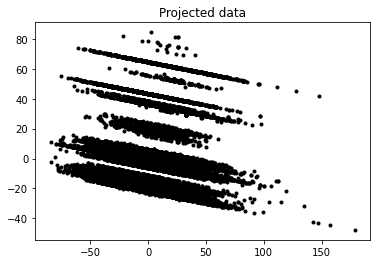

In [177]:
import matplotlib.pyplot as plt


Alpha_data = df_TRS_only.loc[df_TRS_only['Gene'] == 0]
Alpha_data = Alpha_data.drop(['Gene'], axis=1)
print(Alpha_data)




combined_Alpha_MHC = np.concatenate([Alpha_data['MHC A'].values.reshape(-1, 1),
                          Alpha_data['MHC B'].values.reshape(-1, 1),
                          Alpha_data['MHC class'].values.reshape(-1, 1)], axis=1)

combined_Alpha_Epitope = np.concatenate([Alpha_data['Epitope'].values.reshape(-1, 1),
                          Alpha_data['Epitope gene'].values.reshape(-1, 1),
                          Alpha_data['Epitope species'].values.reshape(-1, 1)], axis=1)


# Normalize the data using MinMaxScaler alpha
scaler = MinMaxScaler()
combined_Alpha_MHC_normalized = scaler.fit_transform(combined_Alpha_MHC)


# Normalize the data using MinMaxScaler Epitope
scaler = MinMaxScaler()
combined_Alpha_Epitope_normalized = scaler.fit_transform(combined_Alpha_Epitope)



data = Alpha_data.to_numpy()
ncols = data.shape[1]
X = data[:,0:ncols-7]
label = data[:,ncols-7]
print(label)


                            
pca = PCA(n_components=2)
pca.fit(X)
# Project data onto first two principal components
projX = pca.transform(X)
plt.figure(4)
plt.plot(projX[:,0], projX[:,1], 'k.')
plt.title('Projected data')
plt.show()



In [59]:


#MHC A
#查找V所有的种类，根据种类进行以下操作,
'''
import pandas as pd

# Define a sample datafra3me
df = pd.DataFrame({'HLA': ['HLA-A*01:01', 'HLA-B*01:02', 'HLA-C*01:03']})

# Define the encoding function
def one_hot_encoding(hla, hla_dict=None):
    if hla_dict is None:
        hla_dict = {'HLA-A*01:01': 0, 'HLA-A*01:02': 1, 'HLA-A*01:03': 2,
                    'HLA-B*01:01': 3, 'HLA-B*01:02': 4, 'HLA-B*01:03': 5,
                    'HLA-C*01:01': 6, 'HLA-C*01:02': 7, 'HLA-C*01:03': 8,
                    'HLA-DQA1*01:01': 9, 'HLA-DQA1*01:02': 10, 'HLA-DQA1*01:03': 11}
    n_classes = len(hla_dict)
    one_hot = np.zeros(n_classes)
    one_hot[hla_dict[hla]] = 1
    return one_hot

# Apply the encoding function to the 'HLA' column of the dataframe
df['encoded_HLA'] = df['HLA'].apply(lambda x: one_hot_encoding(x))
print(df)

'''


#MHC B
#查找V所有的种类，根据种类进行以下操作,
'''
import pandas as pd

# Define a sample datafra3me
df = pd.DataFrame({'HLA': ['HLA-A*01:01', 'HLA-B*01:02', 'HLA-C*01:03']})

# Define the encoding function
def one_hot_encoding(hla, hla_dict=None):
    if hla_dict is None:
        hla_dict = {'HLA-A*01:01': 0, 'HLA-A*01:02': 1, 'HLA-A*01:03': 2,
                    'HLA-B*01:01': 3, 'HLA-B*01:02': 4, 'HLA-B*01:03': 5,
                    'HLA-C*01:01': 6, 'HLA-C*01:02': 7, 'HLA-C*01:03': 8,
                    'HLA-DQA1*01:01': 9, 'HLA-DQA1*01:02': 10, 'HLA-DQA1*01:03': 11}
    n_classes = len(hla_dict)
    one_hot = np.zeros(n_classes)
    one_hot[hla_dict[hla]] = 1
    return one_hot

# Apply the encoding function to the 'HLA' column of the dataframe
df['encoded_HLA'] = df['HLA'].apply(lambda x: one_hot_encoding(x))
print(df)

'''

#MHC class
#使用LabelEncoder()对MHC直接进行转换
'''
# Encode the string test data using LabelEncoder
le = LabelEncoder()
#LabelEncoder是一个预处理工具，用于将分类变量(字符串)编码为数值。
# Encode the string data using LabelEncoder
df_TRS_only[["",""]]= df_TRS_only[["",""]].apply(lambda col: le.fit_transform(col))
'''


#Epitope

'''
import pandas as pd

# Define a sample datafra3me
df = pd.DataFrame({'HLA': ['HLA-A*01:01', 'HLA-B*01:02', 'HLA-C*01:03']})

# Define the encoding function
def one_hot_encoding(hla, hla_dict=None):
    if hla_dict is None:
        hla_dict = {'HLA-A*01:01': 0, 'HLA-A*01:02': 1, 'HLA-A*01:03': 2,
                    'HLA-B*01:01': 3, 'HLA-B*01:02': 4, 'HLA-B*01:03': 5,
                    'HLA-C*01:01': 6, 'HLA-C*01:02': 7, 'HLA-C*01:03': 8,
                    'HLA-DQA1*01:01': 9, 'HLA-DQA1*01:02': 10, 'HLA-DQA1*01:03': 11}
    n_classes = len(hla_dict)
    one_hot = np.zeros(n_classes)
    one_hot[hla_dict[hla]] = 1
    return one_hot

# Apply the encoding function to the 'HLA' column of the dataframe
df['encoded_HLA'] = df['HLA'].apply(lambda x: one_hot_encoding(x))
print(df)

'''

#Epitope gene

'''
import pandas as pd

# Define a sample datafra3me
df = pd.DataFrame({'HLA': ['HLA-A*01:01', 'HLA-B*01:02', 'HLA-C*01:03']})

# Define the encoding function
def one_hot_encoding(hla, hla_dict=None):
    if hla_dict is None:
        hla_dict = {'HLA-A*01:01': 0, 'HLA-A*01:02': 1, 'HLA-A*01:03': 2,
                    'HLA-B*01:01': 3, 'HLA-B*01:02': 4, 'HLA-B*01:03': 5,
                    'HLA-C*01:01': 6, 'HLA-C*01:02': 7, 'HLA-C*01:03': 8,
                    'HLA-DQA1*01:01': 9, 'HLA-DQA1*01:02': 10, 'HLA-DQA1*01:03': 11}
    n_classes = len(hla_dict)
    one_hot = np.zeros(n_classes)
    one_hot[hla_dict[hla]] = 1
    return one_hot

# Apply the encoding function to the 'HLA' column of the dataframe
df['encoded_HLA'] = df['HLA'].apply(lambda x: one_hot_encoding(x))
print(df)

'''

#Epitope species
'''
import pandas as pd

# Define a sample datafra3me
df = pd.DataFrame({'HLA': ['HLA-A*01:01', 'HLA-B*01:02', 'HLA-C*01:03']})

# Define the encoding function
def one_hot_encoding(hla, hla_dict=None):
    if hla_dict is None:
        hla_dict = {'HLA-A*01:01': 0, 'HLA-A*01:02': 1, 'HLA-A*01:03': 2,
                    'HLA-B*01:01': 3, 'HLA-B*01:02': 4, 'HLA-B*01:03': 5,
                    'HLA-C*01:01': 6, 'HLA-C*01:02': 7, 'HLA-C*01:03': 8,
                    'HLA-DQA1*01:01': 9, 'HLA-DQA1*01:02': 10, 'HLA-DQA1*01:03': 11}
    n_classes = len(hla_dict)
    one_hot = np.zeros(n_classes)
    one_hot[hla_dict[hla]] = 1
    return one_hot

# Apply the encoding function to the 'HLA' column of the dataframe
df['encoded_HLA'] = df['HLA'].apply(lambda x: one_hot_encoding(x))
print(df)

'''


#Reference 打算删掉！

#Method 打算删掉！

#Meta 打算删掉！

#CDR3fix 打算删除！

#Score


# Encode the string test data using LabelEncoder
#le = LabelEncoder()
#LabelEncoder是一个预处理工具，用于将分类变量(字符串)编码为数值。
# Encode the string data using LabelEncoder
#df_TRS_only[["",""]]= df_TRS_only[["",""]].apply(lambda col: le.fit_transform(col))
# Apply PCA to reduce the dimension of the data
#pca = PCA(n_components=2)
#reduced_data = pca.fit_transform(df.values)

# Store the reduced data in a DataFrame
#reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])

"\nimport pandas as pd\n\n# Define a sample datafra3me\ndf = pd.DataFrame({'HLA': ['HLA-A*01:01', 'HLA-B*01:02', 'HLA-C*01:03']})\n\n# Define the encoding function\ndef one_hot_encoding(hla, hla_dict=None):\n    if hla_dict is None:\n        hla_dict = {'HLA-A*01:01': 0, 'HLA-A*01:02': 1, 'HLA-A*01:03': 2,\n                    'HLA-B*01:01': 3, 'HLA-B*01:02': 4, 'HLA-B*01:03': 5,\n                    'HLA-C*01:01': 6, 'HLA-C*01:02': 7, 'HLA-C*01:03': 8,\n                    'HLA-DQA1*01:01': 9, 'HLA-DQA1*01:02': 10, 'HLA-DQA1*01:03': 11}\n    n_classes = len(hla_dict)\n    one_hot = np.zeros(n_classes)\n    one_hot[hla_dict[hla]] = 1\n    return one_hot\n\n# Apply the encoding function to the 'HLA' column of the dataframe\ndf['encoded_HLA'] = df['HLA'].apply(lambda x: one_hot_encoding(x))\nprint(df)\n\n"

In [60]:
'''
def amino_acid_index_encoding(sequence, aa_dict=None):
    if aa_dict is None:
        aa_dict = {'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6,
                   'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12,
                   'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18,
                   'W': 19, 'Y': 20}
    return [aa_dict[aa] for aa in sequence]

cdr3 = "CASSYTYFV"
encoded_cdr3 = amino_acid_index_encoding(cdr3)
print(encoded_cdr3)
'''

'\ndef amino_acid_index_encoding(sequence, aa_dict=None):\n    if aa_dict is None:\n        aa_dict = {\'A\': 1, \'C\': 2, \'D\': 3, \'E\': 4, \'F\': 5, \'G\': 6,\n                   \'H\': 7, \'I\': 8, \'K\': 9, \'L\': 10, \'M\': 11, \'N\': 12,\n                   \'P\': 13, \'Q\': 14, \'R\': 15, \'S\': 16, \'T\': 17, \'V\': 18,\n                   \'W\': 19, \'Y\': 20}\n    return [aa_dict[aa] for aa in sequence]\n\ncdr3 = "CASSYTYFV"\nencoded_cdr3 = amino_acid_index_encoding(cdr3)\nprint(encoded_cdr3)\n'